In [17]:
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
'''Choose environment name'''
env_name = 'Acrobot-v1'
#env_name = 'MountainCar-v0'
#env_name = 'LunarLander-v2'

'''define the range of the log files you want to plot'''
from_= 0
to = 20

'''define what to plot: episodes before solving the envirnoment or the reward range '''
what_to_plot= 'reward' #'reward'

In [19]:
class Boxplot:
    def __init__(self):
       self.max = -75
       self.random = -500
       self.data = []

    def create_plot(self):
       self.read_logs("../scripts/storage/DQN_logs" + '/' + env_name + '/' +
                      env_name + '_greedy' + '/', from_, to, what_to_plot)
       self.read_logs("../scripts/storage/DQN_logs" + '/' + env_name + '/' +
                      env_name + '_epsilon_greedy' + '/', from_, to, what_to_plot)
       self.read_logs("../scripts/storage/DQN_logs" + '/' + env_name + '/' +
                      env_name + '_MixIn' + '/', from_, to, what_to_plot)
       self.read_logs("../scripts/storage/DQN_logs" + '/' + env_name + '/' +
                      env_name + '_GBRS' + '/', from_, to, what_to_plot)
       self.read_logs("../scripts/storage/DQN_logs" + '/' + env_name + '/' +
                      env_name + '_PBRS' + '/', from_, to, what_to_plot)
       self.read_logs("../scripts/storage/DQN_logs" + '/' + env_name + '/' +
                      env_name + '_DPBRS' + '/', from_, to, what_to_plot)
       self.read_logs("../scripts/storage/DQN_logs" + '/' + env_name + '/' +
                      env_name + '_ICM' + '/', from_, to, what_to_plot)
       self.plot()

    def create_plot_LL(self):
        self.read_logs("../scripts/storage/DQN_logs" + '/' + env_name + '/' +
                       env_name + '_greedy' + '/', from_, to, what_to_plot)
        self.read_logs("../scripts/storage/DQN_logs" + '/' + env_name + '/' +
                       env_name + '_epsilon_greedy' + '/', from_, to, what_to_plot)
        self.read_logs("../scripts/storage/DQN_logs" + '/' + env_name + '/' +
                       env_name + '_MixIn' + '/', from_, to, what_to_plot)
        self.read_logs("../scripts/storage/DQN_logs" + '/' + env_name + '/' +
                       env_name + '_GBRS' + '/', from_, to, what_to_plot)
        self.read_logs("../scripts/storage/DQN_logs" + '/' + env_name + '/' +
                       env_name + '_DPBRS' + '/', from_, to, what_to_plot)
        self.read_logs("../scripts/storage/DQN_logs" + '/' + env_name + '/' +
                       env_name + '_ICM' + '/', from_, to, what_to_plot)
        self.plot()

    def read_logs(self, path, a, b, name):

       log_dir = path
       all_runs = []

       for run_num in range(a, b):
           log_f_name = log_dir + '/DQN_' + env_name + \
               "_log_" + str(run_num) + ".csv"

           data_for_list = pd.read_csv(log_f_name)
           data_for_list = pd.DataFrame(data_for_list)
           #print("data shape : ", data_for_list.shape)
           all_runs.append(data_for_list)

       df_concat = pd.concat(all_runs)
       df_concat_groupby = df_concat.groupby(df_concat.index)
       data_avg = df_concat_groupby.mean()

       data_for_boxplot = []
       data_to_plot = data_avg[name].tolist()

       for value in data_to_plot:
           data_for_boxplot.append(value)
       self.data.append(data_for_boxplot)

    def plot(self):
        plt.boxplot(self.data, showfliers=False)  # showmeans=True

        if env_name == 'LunarLander-v2':
            plt.xticks([1, 2, 3, 4, 5, 6], ["greedy", "eps_greedy",
                                            "MixIn", "GBRS", "DPBRS", "ICM"])
        else:
            plt.xticks([1, 2, 3, 4, 5, 6, 7], ["greedy", "eps_greedy",
                                               "MixIn", "GBRS", "PBRS", "DPBRS", "ICM"])
        plt.title(env_name)
        plt.xlabel("Training Method")
        if what_to_plot == "episode":
            plt.ylabel("Mean Episodes before Solve")
        else:
            plt.ylabel("Mean Reward")

        plt.axhline(self.max, color="limegreen",
                    linestyle="--", lw=1, label="max reward")
        plt.axhline(self.random, color="dodgerblue",
                    linestyle="--", lw=1, label="min reward")
        plt.legend(loc=5)
        plt.show()


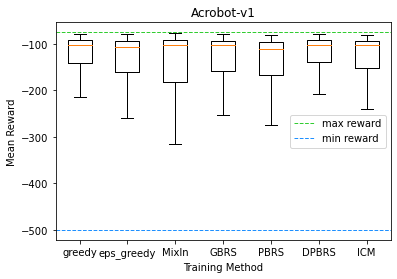

In [20]:
if __name__ == '__main__':

    plot = Boxplot()
    if env_name == 'LunarLander-v2':
        plot.create_plot_LL()
    else:
        plot.create_plot()
